## Paris

Дана выборка недвижимости в Париже в файле ParisHousing.csv. Необходимо определить оптимальное число кластеров для данной выборки при помощи метода kMeans с использованием метода “локтя” с шагом 20.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('ParisHousing.csv')
total_WCSS = []
data.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
# Преобразуем категориальные признаки.

data[['isNewBuilt', 'hasStormProtector', 'hasStorageRoom']] = data[['isNewBuilt', 'hasStormProtector', 
                                                                    'hasStorageRoom']].astype('int')
data = pd.get_dummies(data)
data.head()

,squareMeters,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,...,numberOfRooms_twenty-six,numberOfRooms_twenty-three,numberOfRooms_twenty-two,numberOfRooms_two,category_Basic,category_Luxury,PoolAndYard_has pool and has yard,PoolAndYard_has pool and no yard,PoolAndYard_no pool and has yard,PoolAndYard_no pool and no yard
0,75523,63,9373,3,8,2005,0,1,4313,9005,...,0,0,0,0,1,0,0,1,0,0
1,80771,98,39381,8,6,2015,1,0,3653,2436,...,0,0,0,0,0,1,1,0,0,0
2,55712,19,34457,6,8,2021,0,0,2937,8852,...,0,0,0,0,1,0,0,1,0,0
3,32316,6,27939,10,4,2012,0,1,659,7141,...,0,0,0,0,1,0,0,0,0,1
4,70429,90,38045,3,7,1990,1,0,8435,2429,...,0,0,0,0,0,1,1,0,0,0


In [14]:
# Алгоритм k-means

for k in tqdm(range(20, 201, 20)):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    total_WCSS.append(kmeans.inertia_)

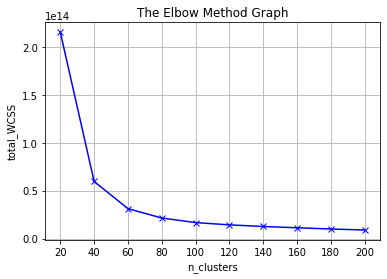

In [15]:
# Построим график для определения оптимального количества кластеров

plt.plot(range(20, 201, 20), total_WCSS, 'bx-')
plt.grid()
plt.title('The Elbow Method Graph')
plt.xlabel('n_clusters')
plt.xticks(range(20, 201, 20))
plt.ylabel('total_WCSS')
plt.show()

Значительное сокращение суммы квадратов растояний от точек до центроидов наблюдается при количестве кластеров = 40.